In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# **Завантаження попередньо підготовлених датасетів**

In [6]:
path_users = '../data/Normalized_dataset_users.csv'
path_features = '../data/Normalized_dataset_features.csv'
path_user_profiles = '../data/User_Profiles.csv'
path_user_profiles_KMEANS = '../data/User_Profiles_clusterized.csv'
path_user_profiles_Hierarchical = '../data/User_Profiles_hierarchical_clusterized.csv'

In [29]:
path_matrix_zero = '../data/filled_clustered/filled_kmeans_zero.csv'
path_matrix_one = '../data/filled_clustered/filled_kmeans_one.csv'
path_matrix_two = '../data/filled_clustered/filled_kmeans_two.csv'
path_matrix_three = '../data/filled_clustered/filled_kmeans_three.csv'
path_matrix_four = '../data/filled_clustered/filled_kmeans_four.csv'
path_matrix = '../data/filled_clustered/filled_dataset_user_track_matrix.csv'

In [8]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [9]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 20)

In [10]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [11]:
df_profiles.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
762ab9285d22002586b6c9b1bf9818d47cd60d40,0.52924,0.636606,0.409091,0.794956,0.615819,0.070591,0.243063,0.289533,0.17747,0.472833,0.524441,0.771751


In [12]:
df_profiles_clustered_kmeans = pd.read_csv(path_user_profiles_KMEANS, on_bad_lines='skip', index_col='user_id')
df_profiles_clustered_kmeans.shape

(1000, 13)

In [13]:
df_profiles_clustered_kmeans.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_k_5
user_id,,,,,,,,,,,,,
f13f56ad3323944286a631060789be818b16cd37,0.460456,0.652682,0.491525,0.795806,0.725424,0.057808,0.215061,0.238225,0.193177,0.455465,0.50797,0.784407,3


In [14]:
df_profiles_clustered_kmeans.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster']

In [15]:
df_profiles_clustered_kmeans.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster'],
      dtype='object')

In [16]:
df_profiles_clustered_hierarchical = pd.read_csv(path_user_profiles_Hierarchical, on_bad_lines='skip', index_col='user_id')
df_profiles_clustered_hierarchical.shape

(1000, 13)

In [17]:
df_profiles_clustered_hierarchical.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
user_id,,,,,,,,,,,,,
cfad9d362e9f86d92feec2fcc24665a48e016389,0.45012,0.656984,0.510274,0.811086,0.756849,0.057547,0.298071,0.168761,0.22947,0.430313,0.518527,0.771918,1


In [18]:
df_profiles_clustered_hierarchical.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster'],
      dtype='object')

In [19]:
df_users = df_users.merge(df_profiles_clustered_kmeans['cluster'], left_on='user_id', right_index=True)

In [20]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'kmeans_cluster']

In [21]:
df_users = df_users.merge(df_profiles_clustered_hierarchical['cluster'], left_on='user_id', right_index=True)
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'kmeans_cluster', 'hierarchical_cluster']

In [30]:
df_filled_matrix_zero = pd.read_csv(path_matrix_zero, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_one = pd.read_csv(path_matrix_one, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_two = pd.read_csv(path_matrix_two, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_three = pd.read_csv(path_matrix_three, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_four = pd.read_csv(path_matrix_four, on_bad_lines='skip', index_col='user_id')

df_filled_matrix = pd.read_csv(path_matrix, on_bad_lines='skip', index_col='user_id')

In [31]:
df_filled_matrix_zero.columns.name = 'track_id'
df_filled_matrix_one.columns.name = 'track_id'
df_filled_matrix_two.columns.name = 'track_id'
df_filled_matrix_three.columns.name = 'track_id'
df_filled_matrix_four.columns.name = 'track_id'

df_filled_matrix.columns.name = 'track_id'

In [42]:
clusters = {
    0: df_filled_matrix_zero,
    1: df_filled_matrix_one,
    2: df_filled_matrix_two,
    3: df_filled_matrix_three,
    4: df_filled_matrix_four,
    100: df_filled_matrix
}

### **Оберемо декілька випадкових користувачів для експерименту**

In [33]:
unique_users = df_profiles.index.values
np.random.shuffle(unique_users)
unique_users = unique_users[:100]

In [34]:
len(unique_users), len(list(set(unique_users)))

(100, 100)

In [35]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

# **Автоматизація процесу рекомендацій (колаборативна фільтрація)**

In [38]:
def get_user_to_user_recommendations(user_track_matrix, user_df, user_id, limit, sort=True):
    filtered_user_df = user_df[user_df['user_id'] == user_id]
    listened_tracks = filtered_user_df['track_id'].values

    user_matrix = user_track_matrix[user_track_matrix.index == user_id]
    not_zero_ratings = user_matrix.loc[:, (user_matrix != 0).all()]

    recommended_tracks = set(listened_tracks).symmetric_difference(not_zero_ratings.columns)
    filtered_user_row = not_zero_ratings[list(recommended_tracks)]

    if limit <= 0:
        limit = filtered_user_row.shape[1]
    
    if sort:
        top_recommendations = filtered_user_row.loc[:, filtered_user_row.loc[user_id].sort_values(ascending=False).head(limit).index]
    else:
        top_recommendations = filtered_user_row.loc[:, filtered_user_row.loc[user_id].head(limit).index]
        
    return top_recommendations

In [39]:
def get_features_of_recommended_tracks(recs, df_features):
    result = df_features.merge(recs.transpose(), on='track_id', how='inner')
    result.rename(columns={recs.index.values[0]: 'similarity'}, inplace=True)
    return result

# **Вимірювання точності підходу з кластерами та без**

In [54]:
recommendations_general_experiment = {}
for user_id in unique_users:
    res_matrix_general = get_user_to_user_recommendations(clusters[100], df_users, user_id, 20)
    recommendations_general_experiment[user_id] = get_features_of_recommended_tracks(res_matrix_general, df_features)

In [53]:
recommendations_with_clusters_experiment = {}
for user_id in unique_users:
    cluster = df_users[df_users['user_id'] == user_id]['kmeans_cluster'].values[0]
    res_matrix_general = get_user_to_user_recommendations(clusters[cluster], df_users, user_id, 20)
    recommendations_with_clusters_experiment[user_id] = get_features_of_recommended_tracks(res_matrix_general, df_features)

In [55]:
len(recommendations_general_experiment), len(recommendations_with_clusters_experiment)

(100, 100)

# **Вимірювання точності**

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [57]:
def simmilarity(user_profile, list_of_recs, features):
  recs = []
  df = list_of_recs[features]
  for col in df.columns:
    median = df[col].median()
    recs.append(median)
  return {
      'mae': mean_absolute_error(y_true=user_profile[features].T.values, y_pred=recs),
      'mse': mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs),
      'rmse': root_mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs)
  }

In [59]:
with_clusters = {}
for user_id in unique_users:
    user_profile = df_profiles.loc[user_id]
    recommendations = recommendations_with_clusters_experiment[user_id]
    with_clusters[user_id] = simmilarity(user_profile, recommendations, features)

In [60]:
without_clusters = {}
for user_id in unique_users:
    user_profile = df_profiles.loc[user_id]
    recommendations = recommendations_general_experiment[user_id]
    without_clusters[user_id] = simmilarity(user_profile, recommendations, features)

In [62]:
maes_first = [v['mae'] for v in with_clusters.values()]
mses_first = [v['mse'] for v in with_clusters.values()]
rmses_first = [v['rmse'] for v in with_clusters.values()]

print(f"Mean MAE: {np.mean(maes_first):.4f}")
print(f"Mean MSE: {np.mean(mses_first):.4f}")
print(f"Mean RMSE: {np.mean(rmses_first):.4f}")

Mean MAE: 0.1104
Mean MSE: 0.0269
Mean RMSE: 0.1593


In [63]:
maes_second = [v['mae'] for v in without_clusters.values()]
mses_second = [v['mse'] for v in without_clusters.values()]
rmses_second = [v['rmse'] for v in without_clusters.values()]

print(f"Mean MAE: {np.mean(maes_second):.4f}")
print(f"Mean MSE: {np.mean(mses_second):.4f}")
print(f"Mean RMSE: {np.mean(rmses_second):.4f}")

Mean MAE: 0.1072
Mean MSE: 0.0259
Mean RMSE: 0.1565


In [65]:
error_measures = {}
for user_id in unique_users:
    if user_id not in error_measures:
        error_measures[user_id] = {
            'with': {},
            'without': {}
        }
    error_measures[user_id]['with'] = with_clusters[user_id]
    error_measures[user_id]['without'] = without_clusters[user_id]

In [66]:
def get_min_metric(error_measures):
    min_metrics = {}
    for metric in ['mae', 'mse', 'rmse']:
        best = min(error_measures.items(), key=lambda item: item[1][metric])
        min_metrics[metric] = best[0]
    return min_metrics

In [67]:
min_metrics = {}
for user in unique_users:
    if user not in min_metrics:
        min_metrics[user] = {}
    min_metrics[user] = get_min_metric(error_measures[user])

In [68]:
min_metrics_df = pd.DataFrame.from_dict(min_metrics, orient='index')
min_metrics_df.sample()

,mae,mse,rmse
353e70f6690406aad7e51706bfd9df6aaab7ec55,with,with,with


In [69]:
min_metrics_df['mae'].unique(), min_metrics_df['mse'].unique(), min_metrics_df['rmse'].unique()

(array(['without', 'with'], dtype=object),
 array(['without', 'with'], dtype=object),
 array(['without', 'with'], dtype=object))

In [70]:
def plot_metrics(metric):
    plt.figure(figsize=(15, 5))
    plt.bar(x=min_metrics_df[metric].value_counts().index.tolist(), height=min_metrics_df[metric].value_counts(), color='maroon', edgecolor='black')
    plt.title(f'best {metric.upper()}')
    plt.xlabel('Metric Name')
    plt.ylabel('Number of results')
    plt.tight_layout()
    plt.show()

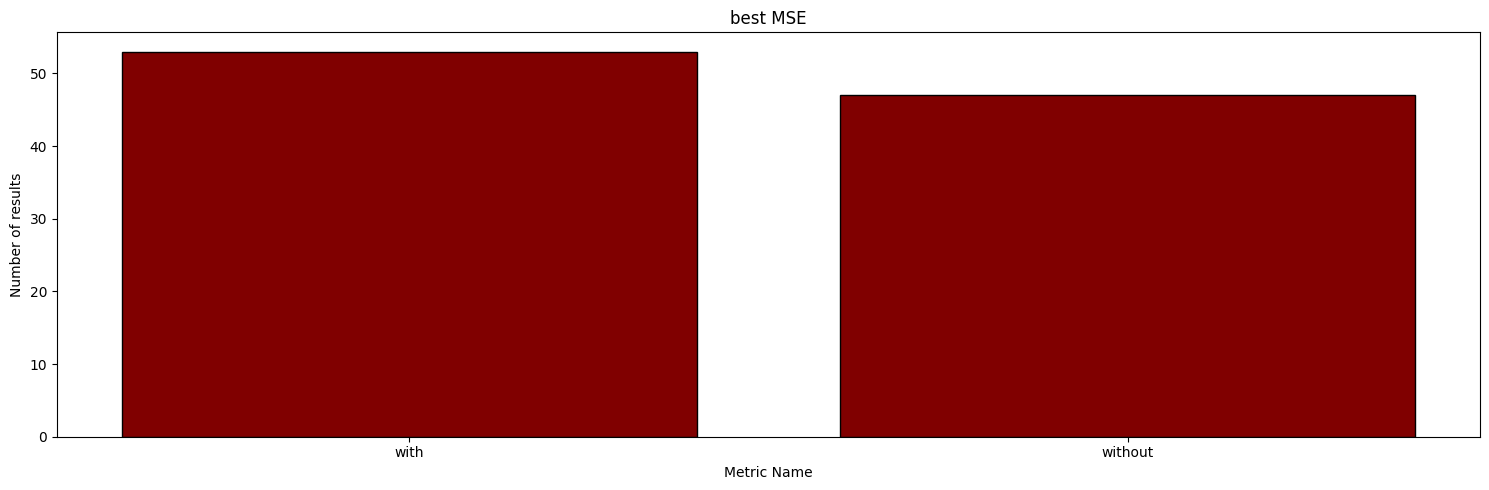

In [71]:
plot_metrics('mse')

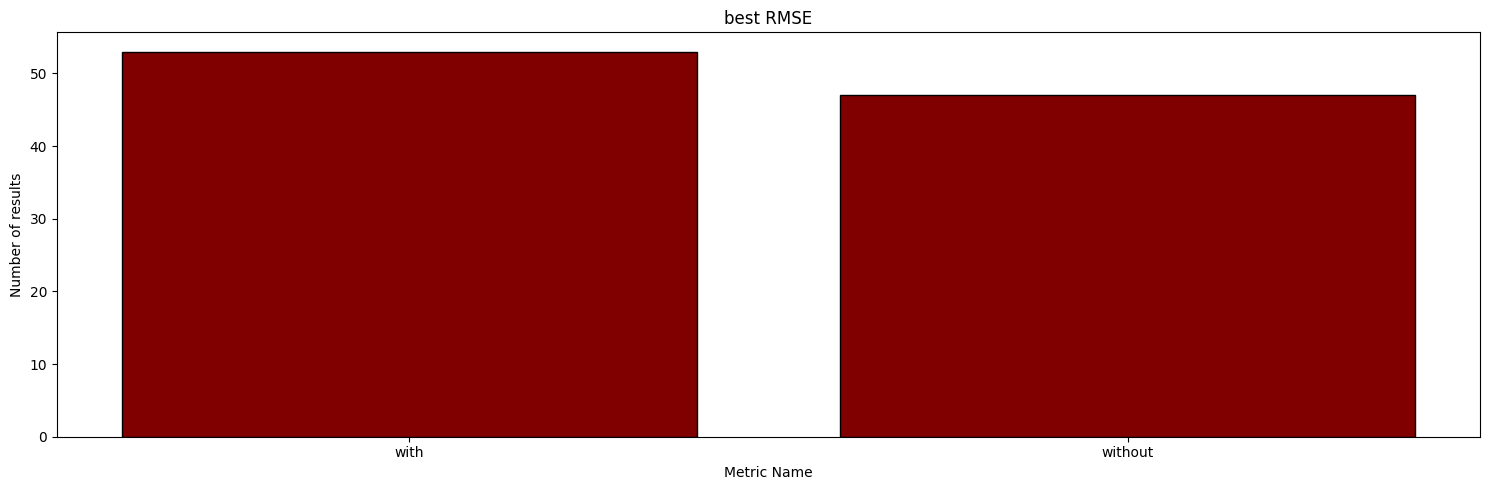

In [72]:
plot_metrics('rmse')

In [84]:
def visualize_metrics(user_id):
    metrics = list(without_clusters[user_id].keys())
    x = np.arange(len(metrics))
    
    without_values = [without_clusters[user_id][metric] for metric in metrics]
    with_values = [with_clusters[user_id][metric] for metric in metrics]
    
    width = 0.35
    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width/2, without_values, width, label='Без кластерів', color='gold', edgecolor='maroon')
    bars2 = ax.bar(x + width/2, with_values, width, label='З кластерами', color='maroon', edgecolor='maroon')
    
    ax.set_ylabel('Значення метрик')
    ax.set_title(f'Порівняння метрик з та без кластеризації\nдля користувача {user_id}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

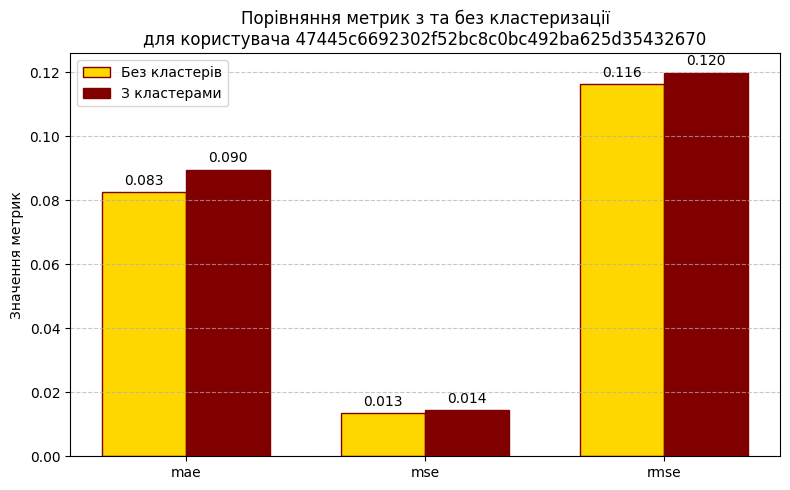

In [85]:
visualize_metrics(random.choice(unique_users))

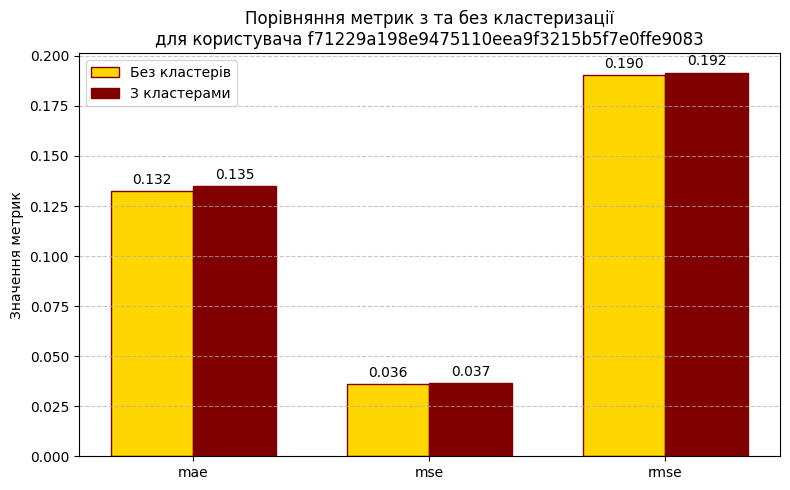

In [89]:
visualize_metrics(random.choice(unique_users))

## **Перевіримо кількість спільних рекомендацій**

In [73]:
from termcolor import colored, cprint

In [74]:
from functools import reduce

In [76]:
for user in unique_users:
    dfs = [    
        recommendations_general_experiment[user],
        recommendations_with_clusters_experiment[user]
    ]
    n_sim = reduce(lambda left, right: pd.merge(left, right, how='inner'), dfs).shape
    print(colored(f'for user {user:<15} without and with clusters {n_sim}', 'red' if n_sim[0] == 0 else 'green'))

for user 7aa559b6657dbd6d363ac2383e70884eaa77beb9 without and with clusters (0, 21)
for user 7bab6799788f7fcf19c66bf3859d3582ee18696b without and with clusters (0, 21)
for user 47445c6692302f52bc8c0bc492ba625d35432670 without and with clusters (0, 21)
for user 3ec9172d9c2dfaf26efdb6cc24edb468353b7be8 without and with clusters (0, 21)
for user 1a816f81e15fa1edb5ad949759de6997ee03c50c without and with clusters (0, 21)
for user c7439e024b3fc054c97153563222494f5d735226 without and with clusters (0, 21)
for user 27f024c0287b915f3f602ade69b8b0256252b7f0 without and with clusters (0, 21)
for user d47d39bbe4e7f44ad477d56202a5ec5f65598b47 without and with clusters (0, 21)
for user aeec3b09b6e7e7e1e0bc6a237da0cd27028f491d without and with clusters (0, 21)
for user 15d9249855d63186b5ffb36220eef430379ec431 without and with clusters (0, 21)
for user 9b71ec3ce7d6f6d3b326cf5f6dd648ae09256f32 without and with clusters (0, 21)
for user 6804f9a5c6da8e7eb5b0b92d1e91121844236c14 without and with clusters 

## **Перевіримо кількість співпадінь з прослуханими треками**

In [77]:
for user in unique_users:
    user_tracks = df_users[df_users['user_id'] == user]
    user_tracks_ids = user_tracks['track_id']

    df = recommendations_general_experiment[user]
    df_filtered = df[df['track_id'].isin(user_tracks_ids)]
    
    n_sim = df_filtered.shape
    print(colored(f'for user {user:<15} {n_sim}', 'red' if n_sim[0] == 0 else 'green'))

for user 7aa559b6657dbd6d363ac2383e70884eaa77beb9 (0, 21)
for user 7bab6799788f7fcf19c66bf3859d3582ee18696b (0, 21)
for user 47445c6692302f52bc8c0bc492ba625d35432670 (0, 21)
for user 3ec9172d9c2dfaf26efdb6cc24edb468353b7be8 (0, 21)
for user 1a816f81e15fa1edb5ad949759de6997ee03c50c (0, 21)
for user c7439e024b3fc054c97153563222494f5d735226 (0, 21)
for user 27f024c0287b915f3f602ade69b8b0256252b7f0 (0, 21)
for user d47d39bbe4e7f44ad477d56202a5ec5f65598b47 (0, 21)
for user aeec3b09b6e7e7e1e0bc6a237da0cd27028f491d (0, 21)
for user 15d9249855d63186b5ffb36220eef430379ec431 (0, 21)
for user 9b71ec3ce7d6f6d3b326cf5f6dd648ae09256f32 (0, 21)
for user 6804f9a5c6da8e7eb5b0b92d1e91121844236c14 (0, 21)
for user a4ccc36714975978b545e35db83584fa9f7fa6c6 (0, 21)
for user 5b1f943ffffcc77321906c185143dc55d57d8ffa (0, 21)
for user 353e70f6690406aad7e51706bfd9df6aaab7ec55 (0, 21)
for user 0a0df26e3d04b9d22a0e12ec48346f2eceb2efda (0, 21)
for user 7991284f490649f97528471e5803762d7d3d10db (0, 21)
for user af4dc

In [78]:
for user in unique_users:
    user_tracks = df_users[df_users['user_id'] == user]
    user_tracks_ids = user_tracks['track_id']

    df = recommendations_with_clusters_experiment[user]
    df_filtered = df[df['track_id'].isin(user_tracks_ids)]
    
    n_sim = df_filtered.shape
    print(colored(f'for user {user:<15} {n_sim}', 'red' if n_sim[0] == 0 else 'green'))

for user 7aa559b6657dbd6d363ac2383e70884eaa77beb9 (0, 21)
for user 7bab6799788f7fcf19c66bf3859d3582ee18696b (0, 21)
for user 47445c6692302f52bc8c0bc492ba625d35432670 (0, 21)
for user 3ec9172d9c2dfaf26efdb6cc24edb468353b7be8 (0, 21)
for user 1a816f81e15fa1edb5ad949759de6997ee03c50c (0, 21)
for user c7439e024b3fc054c97153563222494f5d735226 (0, 21)
for user 27f024c0287b915f3f602ade69b8b0256252b7f0 (0, 21)
for user d47d39bbe4e7f44ad477d56202a5ec5f65598b47 (0, 21)
for user aeec3b09b6e7e7e1e0bc6a237da0cd27028f491d (0, 21)
for user 15d9249855d63186b5ffb36220eef430379ec431 (0, 21)
for user 9b71ec3ce7d6f6d3b326cf5f6dd648ae09256f32 (0, 21)
for user 6804f9a5c6da8e7eb5b0b92d1e91121844236c14 (0, 21)
for user a4ccc36714975978b545e35db83584fa9f7fa6c6 (0, 21)
for user 5b1f943ffffcc77321906c185143dc55d57d8ffa (0, 21)
for user 353e70f6690406aad7e51706bfd9df6aaab7ec55 (0, 21)
for user 0a0df26e3d04b9d22a0e12ec48346f2eceb2efda (0, 21)
for user 7991284f490649f97528471e5803762d7d3d10db (0, 21)
for user af4dc

## **Для кількох випадкових користувачів візулізуймо рекомендації**

In [79]:
def plot_user_recommendation(recommendations:pd.DataFrame, features:list, user_profile:pd.DataFrame):
  num_features = len(features)

  angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
  angles = np.append(angles, angles[0])

  values_rs = user_profile[features].values.flatten()
  values_rs = np.append(values_rs, values_rs[0])

  rows = recommendations.shape[0] // 5
  fig, axs = plt.subplots(rows, 5, figsize=(25, 10 * (rows // 2)), subplot_kw={'projection': 'polar'}, layout='constrained')
  fig.suptitle(f'Visualization of User Recommendations (hybrid)', fontsize=16, fontweight='bold')

  for i, (index, rec) in enumerate(recommendations.iterrows()):
      row = i // 5
      col = i % 5

      values = rec[features].values
      values = np.append(values, values[0])

      ax = axs[row, col]
      ax.fill(angles, values, color='maroon', alpha=0.25)
      ax.plot(angles, values, color='maroon', linewidth=2)
      ax.fill(angles, values_rs, color='yellow', alpha=0.1)
      ax.plot(angles, values_rs, color='yellow', linewidth=2)
      ax.set_xticks(angles[:-1])
      ax.set_xticklabels(features, fontsize=8)
      ax.set_yticklabels([])
      ax.set_title(f'{rec["name"]}\nby {rec["artist"]}',size='medium', fontweight='bold')

  plt.show()

### **Оберемо кількох користувачів**

In [80]:
from numpy import random

In [81]:
users_to_visualize = []
for _ in range(5):
    users_to_visualize.append(random.choice(unique_users))

## Для користувача 1

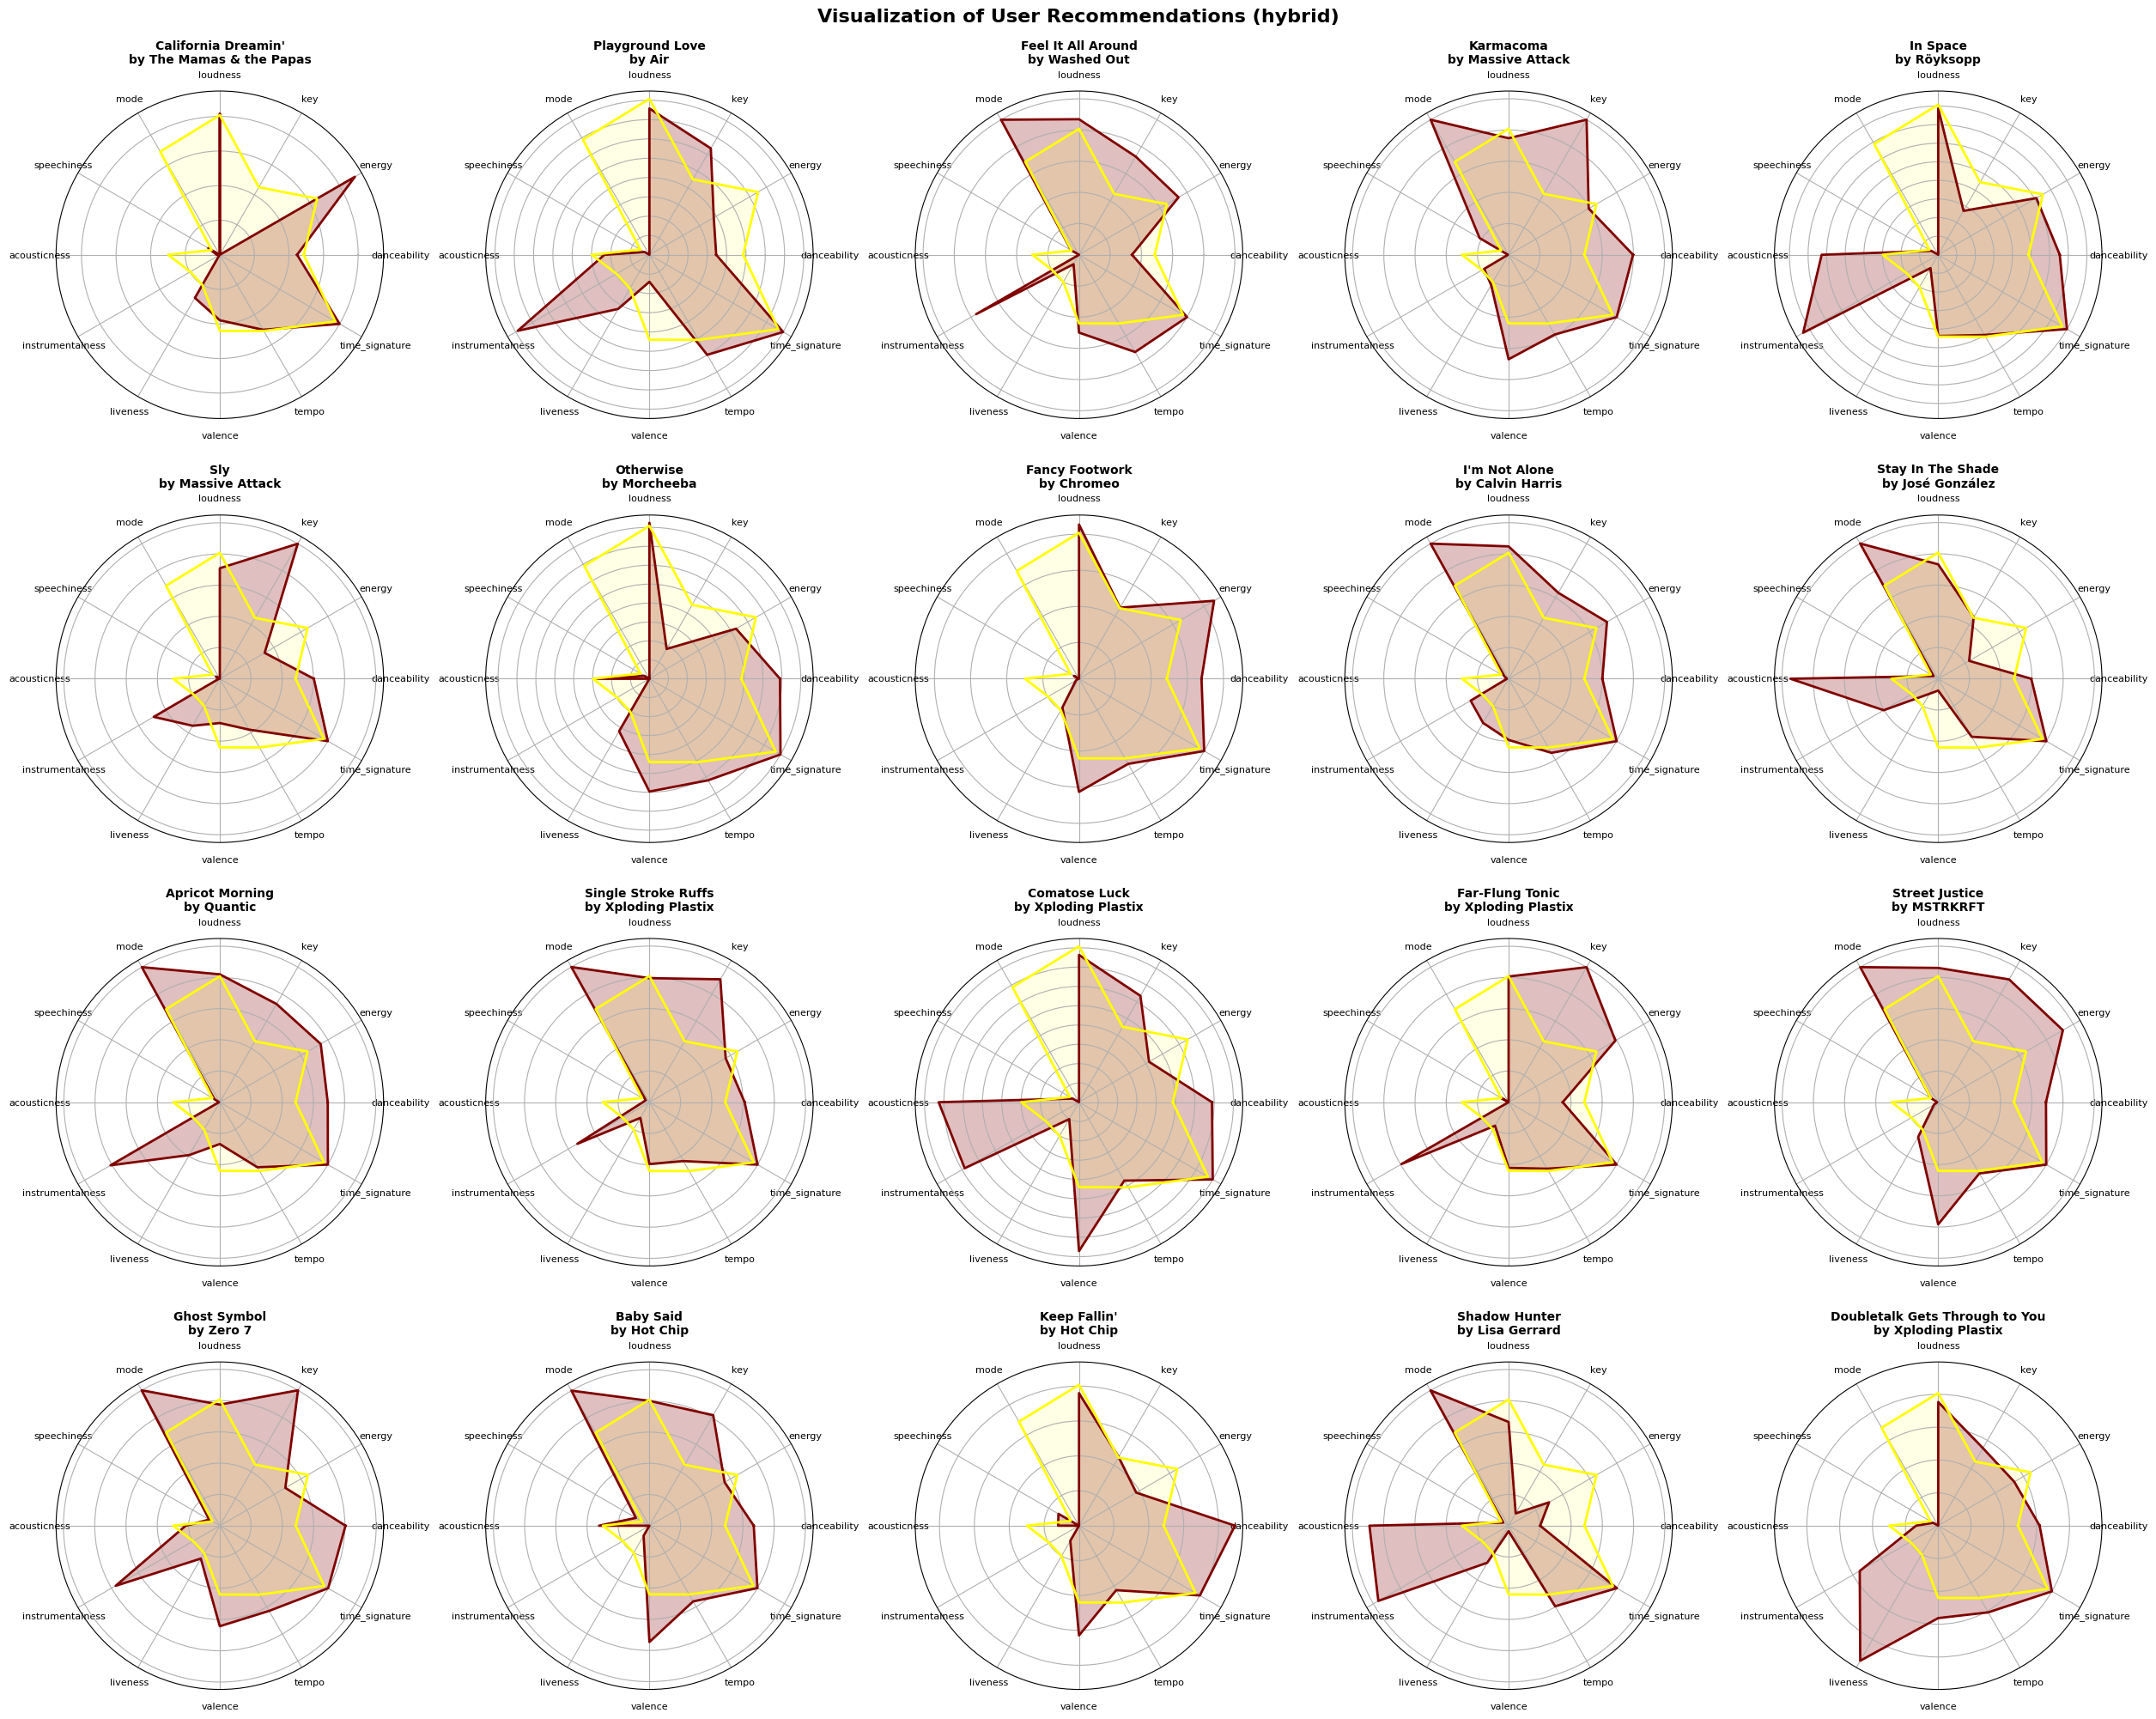

In [82]:
user_id = users_to_visualize[0]
plot_user_recommendation(
    recommendations=recommendations_general_experiment[user_id],
    features=features,
    user_profile=df_profiles[df_profiles.index == user_id]
)

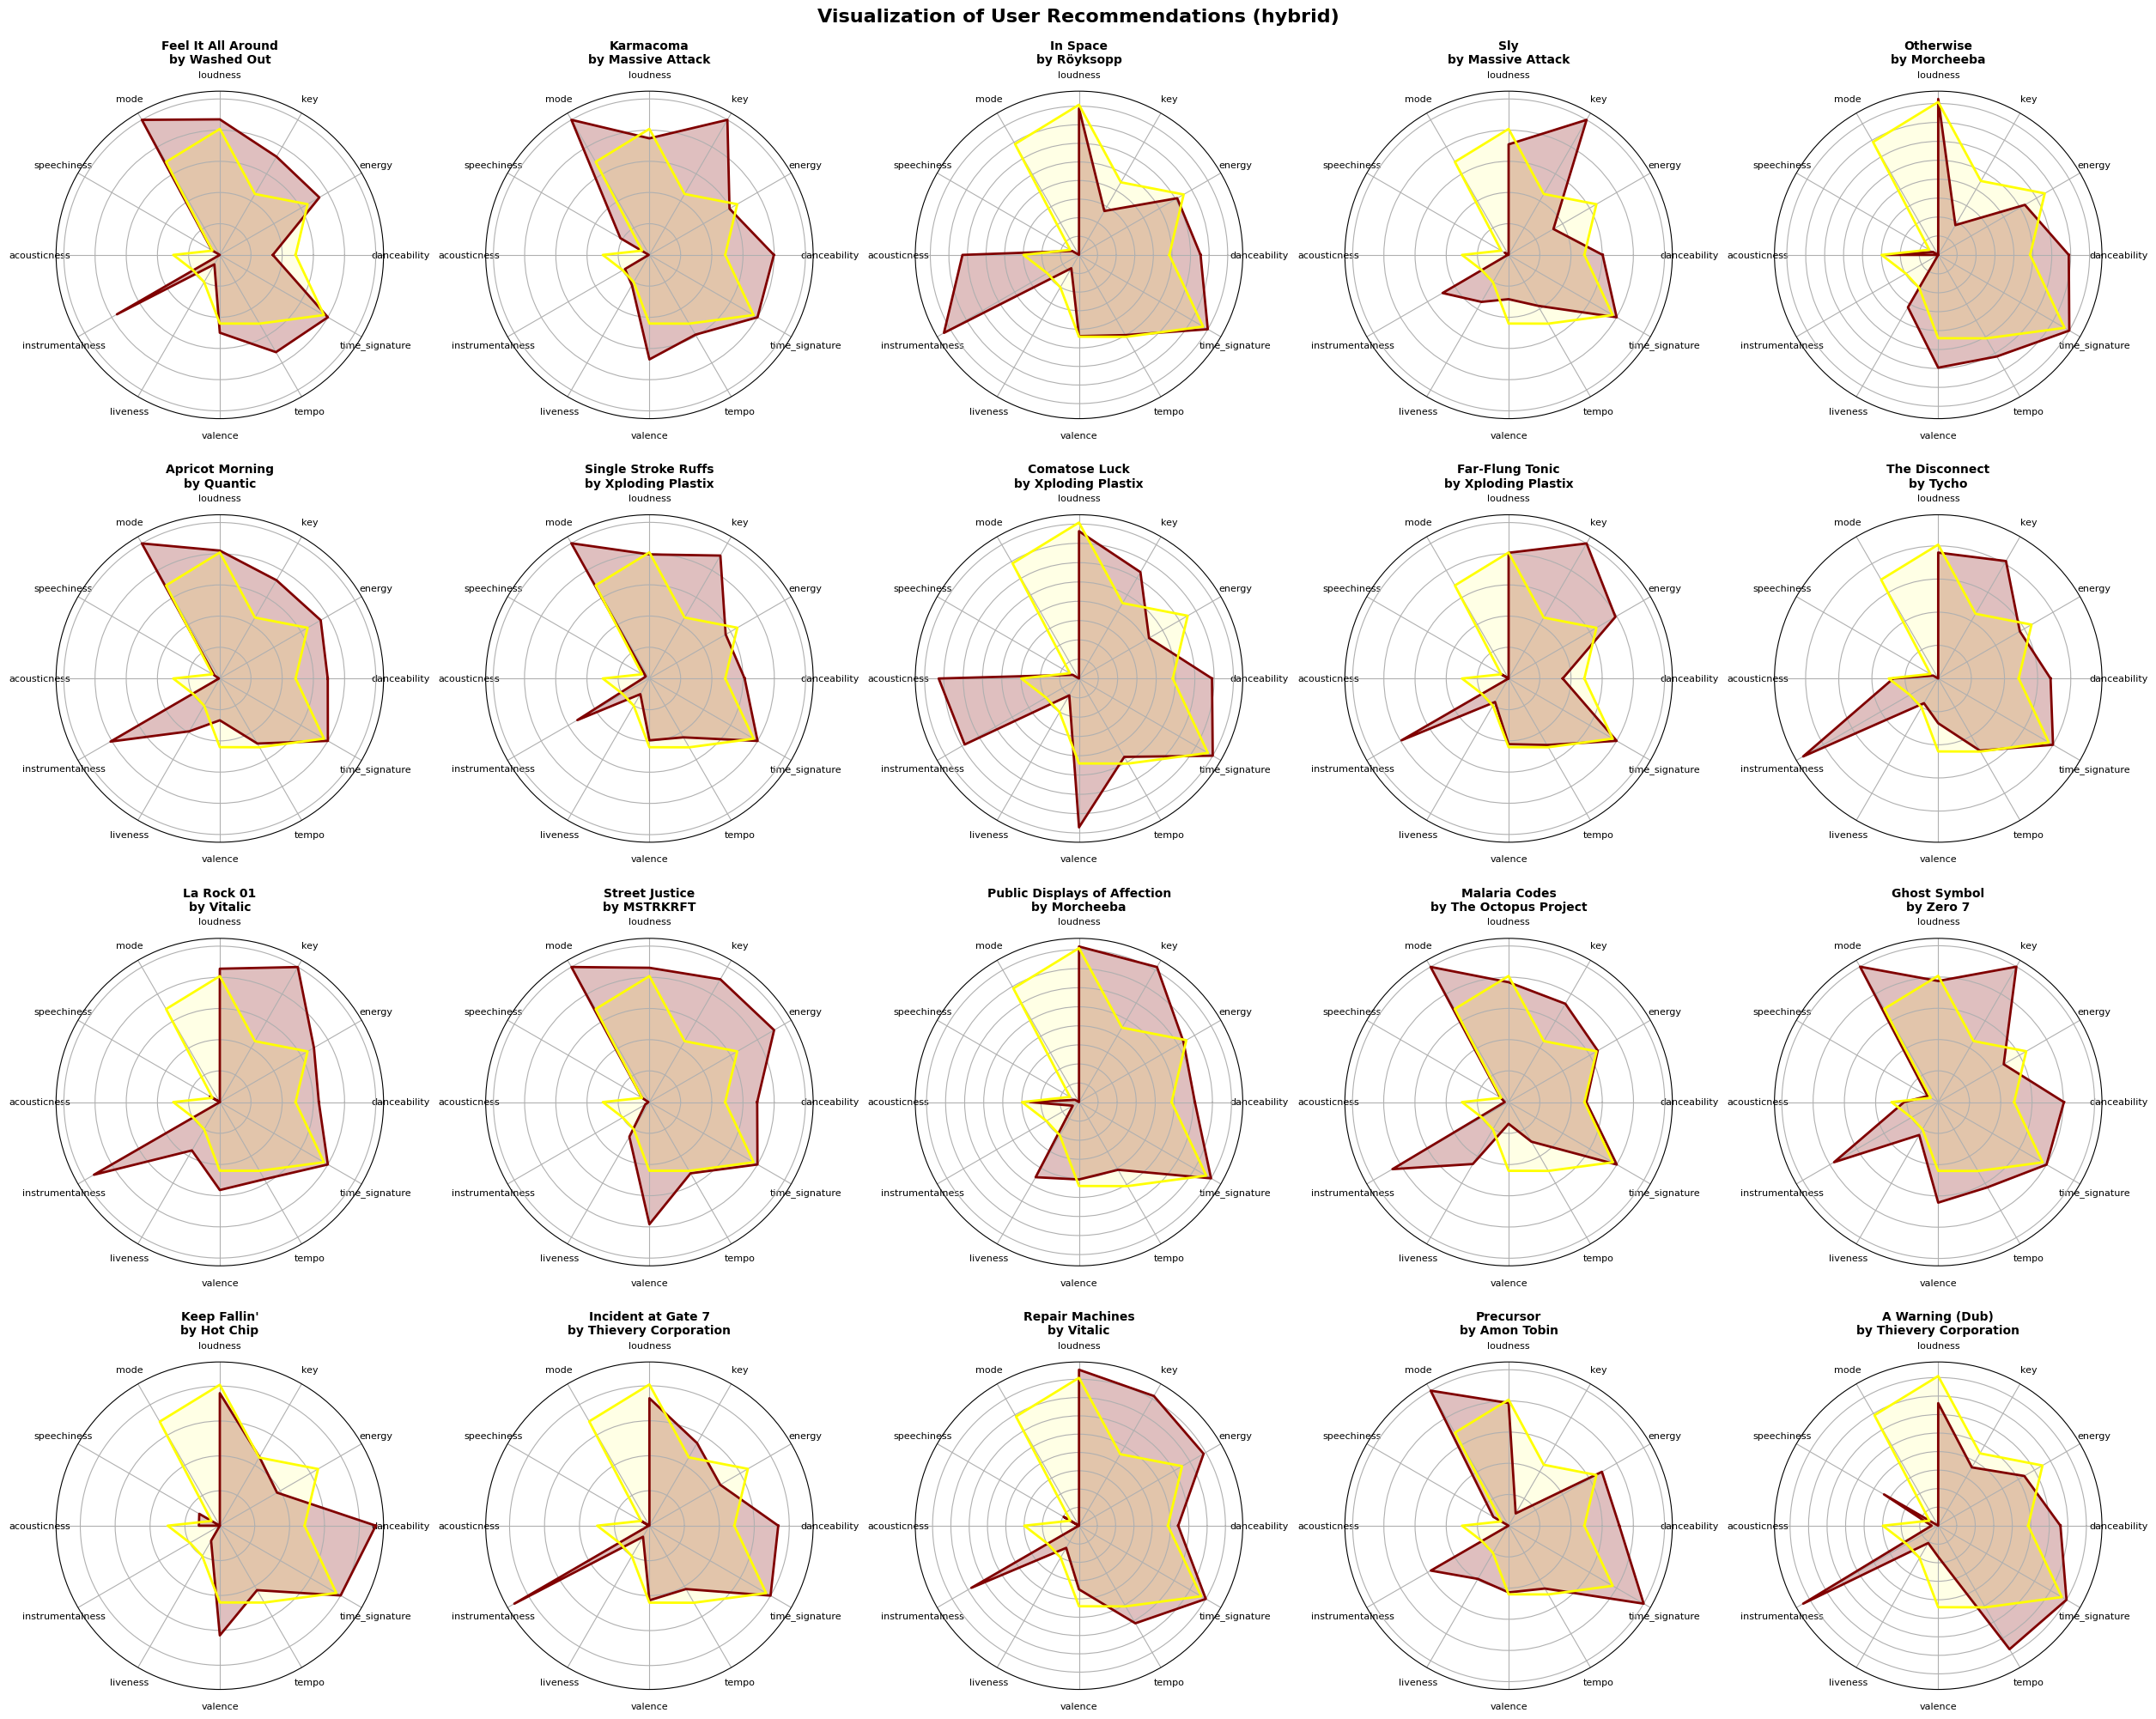

In [83]:
user_id = users_to_visualize[0]
plot_user_recommendation(
    recommendations=recommendations_with_clusters_experiment[user_id],
    features=features,
    user_profile=df_profiles[df_profiles.index == user_id]
)